In [2]:
#importing the necesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The analysis of the dataset - "DataSet-MonthwiseReceiptsDisposal_1" will be carried out in this notebook.

In [3]:
#loading the dataset(csv file) into a dataframe
receipts_disposal = pd.read_csv("E:\\The Institution\\DARPG Hackathon\\DataSet-MonthwiseReceiptsDisposal_1.csv")

In [4]:
#studying the data using the first five observations
receipts_disposal.head()

,org_name,Year,Month,Recetpts,Disposals
0,Central Board of Direct Taxes (Income Tax),2016,1,1600,49
1,Central Board of Direct Taxes (Income Tax),2016,2,2106,207
2,Central Board of Direct Taxes (Income Tax),2016,3,2465,2702
3,Central Board of Direct Taxes (Income Tax),2016,4,1912,1320
4,Central Board of Direct Taxes (Income Tax),2016,5,2797,1588


In [5]:
#finding out the total number of rows and columns in the dataset
receipts_disposal.shape

(5567, 5)

In [6]:
#changing a visible error in the column header
receipts_disposal = receipts_disposal.rename(columns = {"Recetpts":"Receipts"})

In [7]:
#inspecting the data closely for null values and datatypes
receipts_disposal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 5 columns):
org_name     5567 non-null object
Year         5567 non-null int64
Month        5567 non-null int64
Receipts     5567 non-null int64
Disposals    5567 non-null int64
dtypes: int64(4), object(1)
memory usage: 217.6+ KB


The dataset does not contain any missing values. All columns except "org_name" contain integer type values. 

In [8]:
#finding summary statistics
receipts_disposal.describe()

,Year,Month,Receipts,Disposals
count,5567.000000,5567.000000,5567.000000,5567.000000
mean,2017.489851,6.391054,837.197773,688.464703
std,1.102636,3.377380,1631.776291,1591.735766
min,2016.000000,1.000000,1.000000,1.000000
25%,2017.000000,3.000000,82.000000,48.000000
50%,2017.000000,6.000000,264.000000,160.000000
75%,2018.000000,9.000000,888.000000,606.500000
max,2019.000000,12.000000,24977.000000,25005.000000


1.) The mean values of the columns "Receipts" and "Disposals" are much lesser than their respective median values(50%).
2.) There is a large difference between the 75% values and max values of "Receipts" and "Disposals" suggesting the presence of some very high values
3.) The range of values for "Receipts" is 1 to 24977 and "Disposals" is 1 to 25005 

As per the information provided, the receipts and disposals have been recorded for a period of 47 months (January 2016 - November 2019)

In [9]:
#Inspecting the number of unique values/entries in "org_name" column
receipts_disposal["org_name"].value_counts()

Government of Chattisgarh                  47
Department of Defence Production           47
Ministry of Tribal Affairs                 47
Ministry of Railways ( Railway Board)      47
Legislative Department                     47
                                           ..
Committee on Petitions Rajya Sabha          7
Department of Fisheries                     3
National Human Rights Commission            2
Investment Grievance Redress Cell           1
National Commission for Scheduled Caste     1
Name: org_name, Length: 129, dtype: int64

There are 129 different departments but not all of them have a complete record of 47 months

In [10]:
#extracting organizations having record of 47 months
org_counts = receipts_disposal['org_name'].value_counts()
org_list = org_counts[org_counts == 47].index.tolist()

print(len(org_list), " out of 129 organizations show a complete record of 47 months and they are as below:")
org_list

76  out of 129 organizations show a complete record of 47 months and they are as below:


['Government of Chattisgarh',
 'Department of Defence Production',
 'Ministry of Tribal Affairs',
 'Ministry of Railways ( Railway Board)',
 'Legislative Department',
 'Ministry of Corporate Affairs',
 'Department of School Education and Literacy',
 'Department of Defence Finance',
 'Department of Scientific & Industrial Research',
 'Department of Financial Services (Insurance Division)',
 'Government of Tamil Nadu',
 'Ministry of Women and Child Development',
 'Government of Kerala',
 'O/o the Comptroller & Auditor General of India',
 'Ministry of Skill Development and Entrepreneurship',
 'Securities and Exchange Board of India',
 'Department of Agriculture, Cooperation and Farmers Welfare',
 'Government of Gujarat',
 'Department of Financial Services (Banking Division)',
 'Ministry of Housing and Urban Affairs',
 'Ministry of External Affairs',
 'Department of Ex Servicemen Welfare',
 'Department of Rural Development',
 'Government of Maharashtra',
 'Ministry of Labour and Employment

It will be better to consider only these 76 organizations for further analyses. It will also help maintain consistent & complete data entries for forecasting and prediction

In [11]:
#eliminating columns from the dataframe that are no longer required
receipts_disposal = receipts_disposal[receipts_disposal['org_name'].isin(org_list)]
print(receipts_disposal.shape)

(3572, 5)


So, 3572 out of 5576 data entries are being considered for further analysis. 

The columns of "Year" and "Month" can be combined together into a datetime column for better understanding and representation.

In [12]:
#combining "Year" and "Month" into a single column
receipts_disposal["Date"] = pd.to_datetime(receipts_disposal["Year"].astype(str) + "-" + receipts_disposal["Month"].astype(str), format = "%Y-%d")
receipts_disposal = receipts_disposal.drop(["Year", "Month"],axis=1)

In [13]:
print("Now the dataframe looks like:")
receipts_disposal.head(10)

Now the dataframe looks like:


,org_name,Receipts,Disposals,Date
0,Central Board of Direct Taxes (Income Tax),1600,49,2016-01-01
1,Central Board of Direct Taxes (Income Tax),2106,207,2016-01-02
2,Central Board of Direct Taxes (Income Tax),2465,2702,2016-01-03
3,Central Board of Direct Taxes (Income Tax),1912,1320,2016-01-04
4,Central Board of Direct Taxes (Income Tax),2797,1588,2016-01-05
5,Central Board of Direct Taxes (Income Tax),2813,2944,2016-01-06
6,Central Board of Direct Taxes (Income Tax),2358,2893,2016-01-07
7,Central Board of Direct Taxes (Income Tax),2676,3929,2016-01-08
8,Central Board of Direct Taxes (Income Tax),2258,2043,2016-01-09
9,Central Board of Direct Taxes (Income Tax),1924,2942,2016-01-10


Before starting with the organization-wise analysis, it is imperative to select relevant organizations. 

Therefore, we select top 10 ministires/organizations/states that generate the highest receipts.

We also collect details about the corresponding nodal officers in each ministry/organization/state using data from the NodalOfficers file

In [14]:
top10orgs = receipts_disposal.groupby('org_name')["Receipts"].sum()


In [15]:
top10orgs.sort_values(ascending=False)[:10]


org_name
Government of Uttar Pradesh                            503114
Department of Financial Services (Banking Division)    391855
Department of Telecommunications                       261335
Ministry of Railways ( Railway Board)                  213276
Government of Maharashtra                              154441
Department of Posts                                    152588
Central Board of Direct Taxes (Income Tax)             140636
Ministry of Labour and Employment                      131283
Ministry of Home Affairs                               107286
Government of Madhya Pradesh                           104370
Name: Receipts, dtype: int64

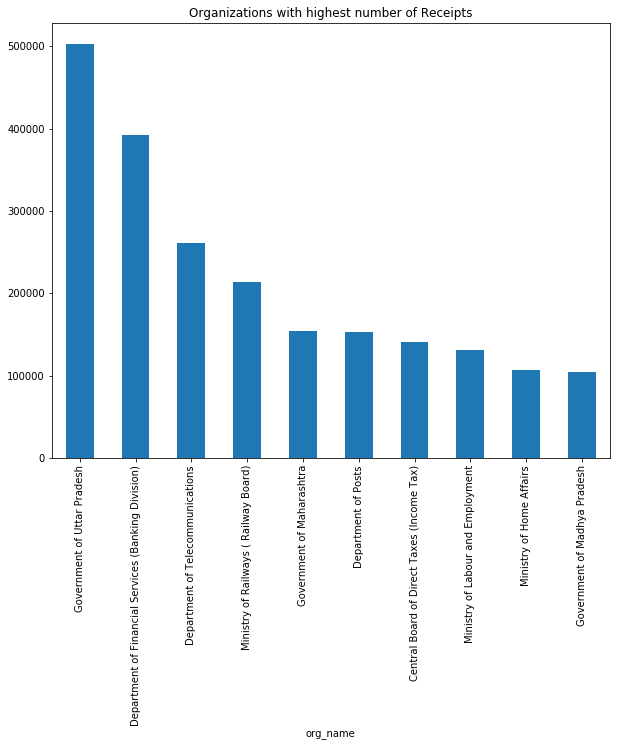

In [16]:
fig = plt.figure(figsize=(10,8))
(top10orgs.sort_values(ascending=False)[:10]).plot.bar(ylim=0)
plt.title("Organizations with highest number of Receipts")
plt.show()

It is also observed that the data has been grouped-by according to the organization name from January 2016 to November 2019. So it is better to analyze the receipts and disposals of each organization's data separately. 

The sliced dataframes of each department will be similar in shape with 47 rows and 4 columns

In [17]:
govt_UP = receipts_disposal[receipts_disposal["org_name"]=="Government of Uttar Pradesh"]
govt_UP.head()

,org_name,Receipts,Disposals,Date
3562,Government of Uttar Pradesh,3559,6,2016-01-01
3563,Government of Uttar Pradesh,4255,4,2016-01-02
3564,Government of Uttar Pradesh,5008,8,2016-01-03
3565,Government of Uttar Pradesh,4969,16,2016-01-04
3566,Government of Uttar Pradesh,5877,90,2016-01-05


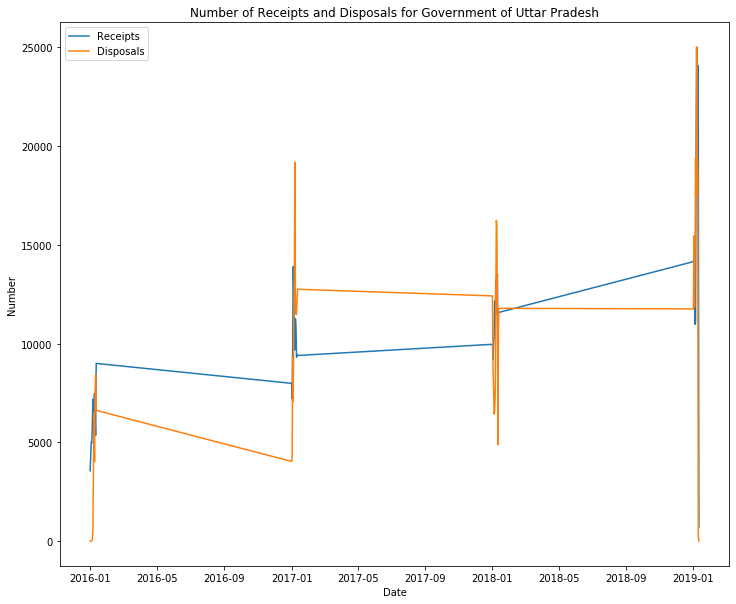

In [18]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(govt_UP.Date,govt_UP.Receipts, label="Receipts")
plt.plot(govt_UP.Date,govt_UP.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Government of Uttar Pradesh")
plt.legend()
plt.show()

In [19]:
print("Statistics for the Government of Uttar Pradesh:")
receipts1 = govt_UP.Receipts.sum()
disposals1 = govt_UP.Disposals.sum()
print("Total Receipts generated:", govt_UP.Receipts.sum())
print("Total Number of Disposals:", govt_UP.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts1-disposals1)
print("Efficiency rate:", round(disposals1*100/receipts1))
print("Average number of disposals every month:", round(govt_UP.Disposals.mean()))
print("Number of Nodal Officers:1")

Statistics for the Government of Uttar Pradesh:
Total Receipts generated: 503114
Total Number of Disposals: 440700
Pending Receipts as on 01 November 2019: 62414
Efficiency rate: 88.0
Average number of disposals every month: 9377
Number of Nodal Officers:1


In [20]:
dept_finance = receipts_disposal[receipts_disposal["org_name"]=="Department of Financial Services (Banking Division)"]
dept_finance.head()

,org_name,Receipts,Disposals,Date
934,Department of Financial Services (Banking Divi...,4397,1652,2016-01-01
935,Department of Financial Services (Banking Divi...,5873,3433,2016-01-02
936,Department of Financial Services (Banking Divi...,5296,5542,2016-01-03
937,Department of Financial Services (Banking Divi...,4697,4311,2016-01-04
938,Department of Financial Services (Banking Divi...,8486,5164,2016-01-05


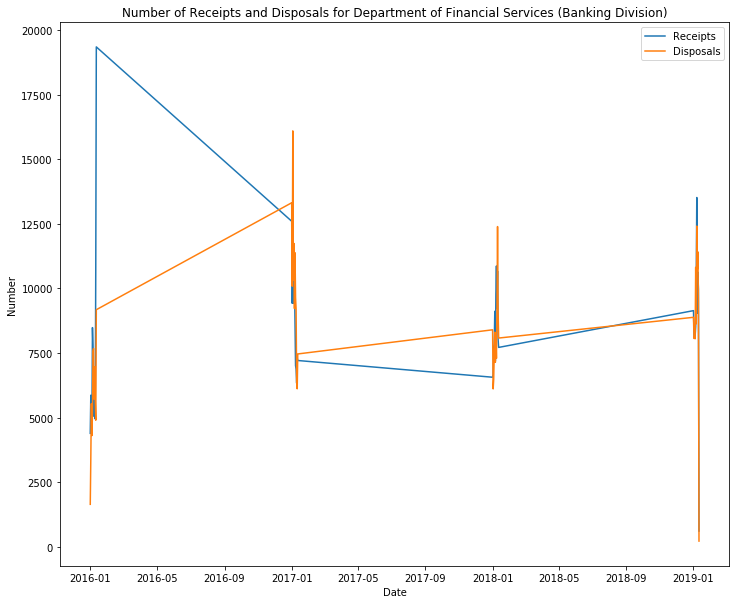

In [21]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(dept_finance.Date,dept_finance.Receipts, label="Receipts")
plt.plot(dept_finance.Date,dept_finance.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Department of Financial Services (Banking Division)")
plt.legend()
plt.show()

In [22]:
print("Statistics for the Department of Financial Services (Banking Division):")
receipts2 = dept_finance.Receipts.sum()
disposals2 = dept_finance.Disposals.sum()
print("Total Receipts generated:", dept_finance.Receipts.sum())
print("Total Number of Disposals:", dept_finance.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts2-disposals2)
print("Efficiency rate:", round(disposals2*100/receipts2))
print("Average number of disposals every month:", round(dept_finance.Disposals.mean()))
print("Number of Nodal Officers:938")

Statistics for the Department of Financial Services (Banking Division):
Total Receipts generated: 391855
Total Number of Disposals: 383908
Pending Receipts as on 01 November 2019: 7947
Efficiency rate: 98.0
Average number of disposals every month: 8168
Number of Nodal Officers:938


In [23]:
dept_telecom = receipts_disposal[receipts_disposal["org_name"]=="Department of Telecommunications"]
dept_telecom.head()

,org_name,Receipts,Disposals,Date
2122,Department of Telecommunications,4336,2199,2016-01-01
2123,Department of Telecommunications,4755,4278,2016-01-02
2124,Department of Telecommunications,5118,5063,2016-01-03
2125,Department of Telecommunications,4806,5123,2016-01-04
2126,Department of Telecommunications,5498,5296,2016-01-05


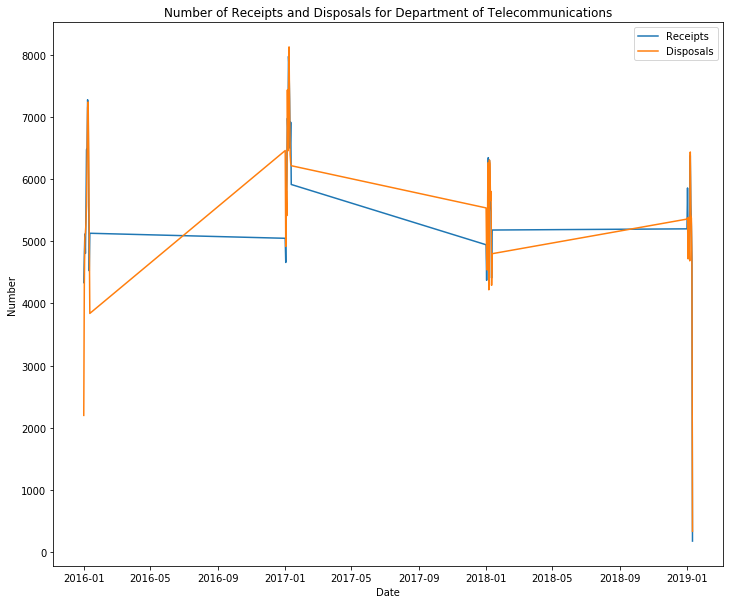

In [24]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(dept_telecom.Date,dept_telecom.Receipts, label="Receipts")
plt.plot(dept_telecom.Date,dept_telecom.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Department of Telecommunications")
plt.legend()
plt.show()

In [25]:
print("Statistics for the Department of Telecommunication:")
receipts3 = dept_telecom.Receipts.sum()
disposals3 = dept_telecom.Disposals.sum()
print("Total Receipts generated:", dept_telecom.Receipts.sum())
print("Total Number of Disposals:", dept_telecom.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts3-disposals3)
print("Efficiency rate:", round(disposals3*100/receipts3))
print("Average number of disposals every month:", round(dept_telecom.Disposals.mean()))
print("Number of Nodal Officers: 1394")

Statistics for the Department of Telecommunication:
Total Receipts generated: 261335
Total Number of Disposals: 258587
Pending Receipts as on 01 November 2019: 2748
Efficiency rate: 99.0
Average number of disposals every month: 5502
Number of Nodal Officers: 1394


In [26]:
min_rail = receipts_disposal[receipts_disposal["org_name"]=="Ministry of Railways ( Railway Board)"]
min_rail.head()

,org_name,Receipts,Disposals,Date
4867,Ministry of Railways ( Railway Board),3898,1268,2016-01-01
4868,Ministry of Railways ( Railway Board),4306,2973,2016-01-02
4869,Ministry of Railways ( Railway Board),8101,3986,2016-01-03
4870,Ministry of Railways ( Railway Board),4283,3946,2016-01-04
4871,Ministry of Railways ( Railway Board),4504,7385,2016-01-05


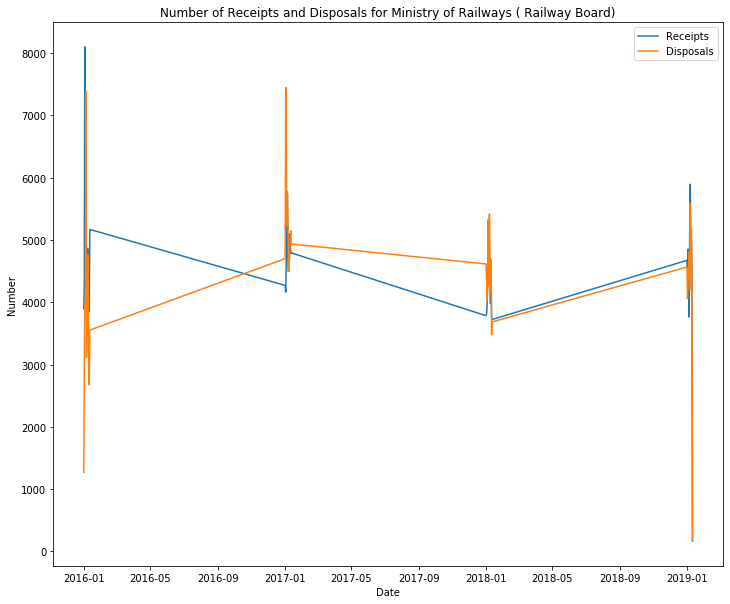

In [27]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(min_rail.Date,min_rail.Receipts, label="Receipts")
plt.plot(min_rail.Date,min_rail.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Ministry of Railways ( Railway Board)")
plt.legend()
plt.show()

In [28]:
print("Statistics for the Ministry of Railways ( Railway Board):")
receipts4 = min_rail.Receipts.sum()
disposals4 = min_rail.Disposals.sum()
print("Total Receipts generated:", min_rail.Receipts.sum())
print("Total Number of Disposals:", min_rail.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts4-disposals4)
print("Efficiency rate:", round(disposals4*100/receipts4))
print("Average number of disposals every month:", round(min_rail.Disposals.mean()))
print("Number of Nodal Officers:1840")

Statistics for the Ministry of Railways ( Railway Board):
Total Receipts generated: 213276
Total Number of Disposals: 208476
Pending Receipts as on 01 November 2019: 4800
Efficiency rate: 98.0
Average number of disposals every month: 4436
Number of Nodal Officers:1840


In [29]:
govt_Maha = receipts_disposal[receipts_disposal["org_name"]=="Government of Maharashtra"]
govt_Maha.head()

,org_name,Receipts,Disposals,Date
2881,Government of Maharashtra,1503,1,2016-01-01
2882,Government of Maharashtra,1831,26,2016-01-02
2883,Government of Maharashtra,1972,46,2016-01-03
2884,Government of Maharashtra,2029,130,2016-01-04
2885,Government of Maharashtra,1955,218,2016-01-05


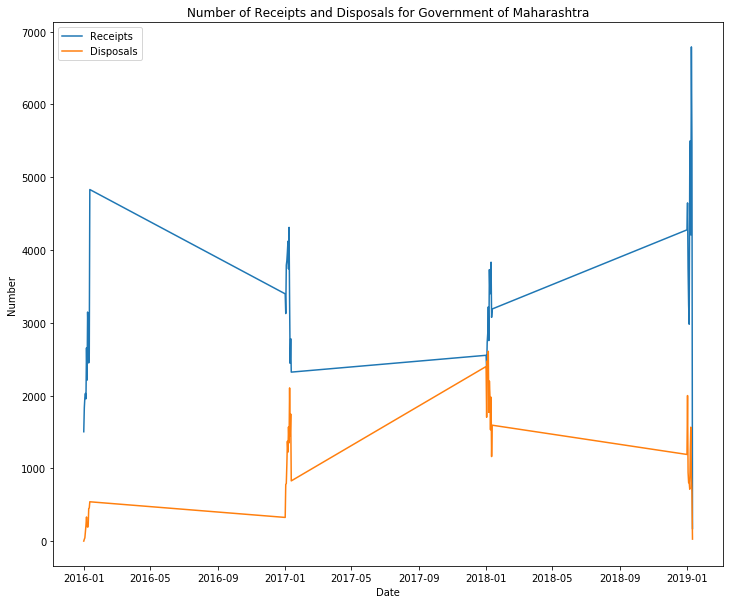

In [30]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(govt_Maha.Date,govt_Maha.Receipts, label="Receipts")
plt.plot(govt_Maha.Date,govt_Maha.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Government of Maharashtra")
plt.legend()
plt.show()

In [31]:
print("Statistics for the Government of Maharashtra:")
receipts5 = govt_Maha.Receipts.sum()
disposals5 = govt_Maha.Disposals.sum()
print("Total Receipts generated:", govt_Maha.Receipts.sum())
print("Total Number of Disposals:", govt_Maha.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts5-disposals5)
print("Efficiency rate:", round(disposals5*100/receipts5))
print("Average number of disposals every month:", round(govt_Maha.Disposals.mean()))
print("Number of Nodal Officers:4232")

Statistics for the Government of Maharashtra:
Total Receipts generated: 154441
Total Number of Disposals: 52032
Pending Receipts as on 01 November 2019: 102409
Efficiency rate: 34.0
Average number of disposals every month: 1107
Number of Nodal Officers:4232


In [32]:
dept_posts = receipts_disposal[receipts_disposal["org_name"]=="Department of Posts"]
dept_posts.head()

,org_name,Receipts,Disposals,Date
1656,Department of Posts,1585,814,2016-01-01
1657,Department of Posts,1717,1702,2016-01-02
1658,Department of Posts,1942,1794,2016-01-03
1659,Department of Posts,2028,1907,2016-01-04
1660,Department of Posts,2180,2086,2016-01-05


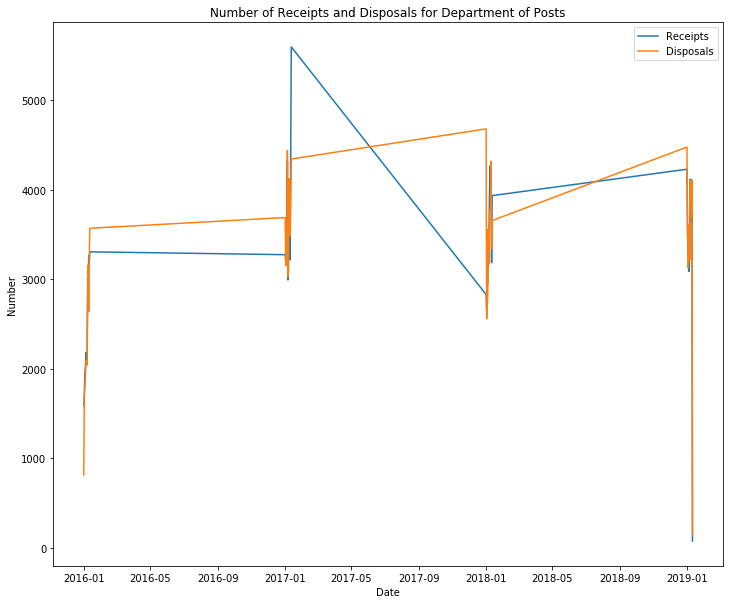

In [33]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(dept_posts.Date,dept_posts.Receipts, label="Receipts")
plt.plot(dept_posts.Date,dept_posts.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Department of Posts")
plt.legend()
plt.show()

In [34]:
print("Statistics for the Department of Posts:")
receipts6 = dept_posts.Receipts.sum()
disposals6 = dept_posts.Disposals.sum()
print("Total Receipts generated:", dept_posts.Receipts.sum())
print("Total Number of Disposals:", dept_posts.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts6-disposals6)
print("Efficiency rate:", round(disposals6*100/receipts6))
print("Average number of disposals every month:", round(dept_posts.Disposals.mean()))
print("Number of Nodal Officers: 1252")

Statistics for the Department of Posts:
Total Receipts generated: 152588
Total Number of Disposals: 150681
Pending Receipts as on 01 November 2019: 1907
Efficiency rate: 99.0
Average number of disposals every month: 3206
Number of Nodal Officers: 1252


In [35]:
cbd_taxes = receipts_disposal[receipts_disposal["org_name"]=="Central Board of Direct Taxes (Income Tax)"]
cbd_taxes.head()

,org_name,Receipts,Disposals,Date
0,Central Board of Direct Taxes (Income Tax),1600,49,2016-01-01
1,Central Board of Direct Taxes (Income Tax),2106,207,2016-01-02
2,Central Board of Direct Taxes (Income Tax),2465,2702,2016-01-03
3,Central Board of Direct Taxes (Income Tax),1912,1320,2016-01-04
4,Central Board of Direct Taxes (Income Tax),2797,1588,2016-01-05


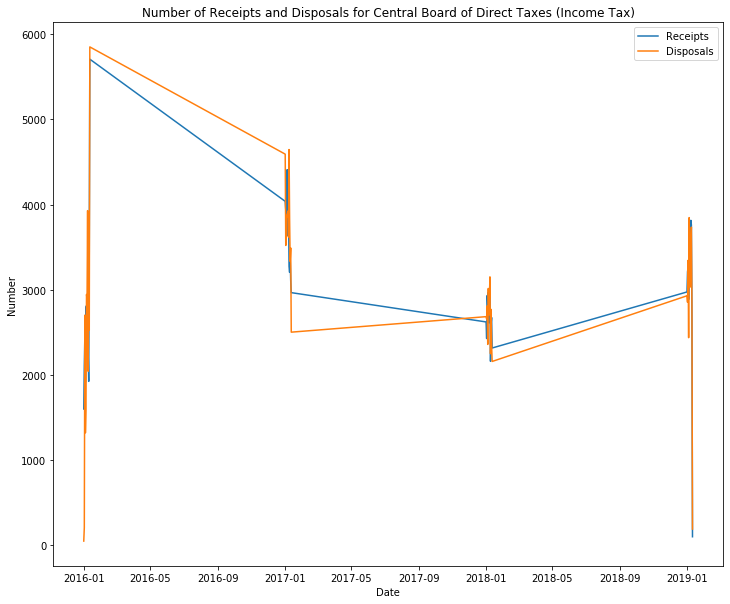

In [36]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(cbd_taxes.Date,cbd_taxes.Receipts, label="Receipts")
plt.plot(cbd_taxes.Date,cbd_taxes.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Central Board of Direct Taxes (Income Tax)")
plt.legend()
plt.show()

In [37]:
print("Statistics for the Central Board of Direct Taxes (Income Tax):")
receipts7 = cbd_taxes.Receipts.sum()
disposals7 = cbd_taxes.Disposals.sum()
print("Total Receipts generated:", cbd_taxes.Receipts.sum())
print("Total Number of Disposals:", cbd_taxes.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts7-disposals7)
print("Efficiency rate:", round(disposals7*100/receipts7))
print("Average number of disposals every month:", round(cbd_taxes.Disposals.mean()))
print("Number of Nodal Officers:5000")

Statistics for the Central Board of Direct Taxes (Income Tax):
Total Receipts generated: 140636
Total Number of Disposals: 138037
Pending Receipts as on 01 November 2019: 2599
Efficiency rate: 98.0
Average number of disposals every month: 2937
Number of Nodal Officers:5000


In [38]:
min_le = receipts_disposal[receipts_disposal["org_name"]=="Ministry of Labour and Employment"]
min_le.head()

,org_name,Receipts,Disposals,Date
4449,Ministry of Labour and Employment,1794,546,2016-01-01
4450,Ministry of Labour and Employment,2222,2638,2016-01-02
4451,Ministry of Labour and Employment,2514,2615,2016-01-03
4452,Ministry of Labour and Employment,1810,1826,2016-01-04
4453,Ministry of Labour and Employment,1628,1662,2016-01-05


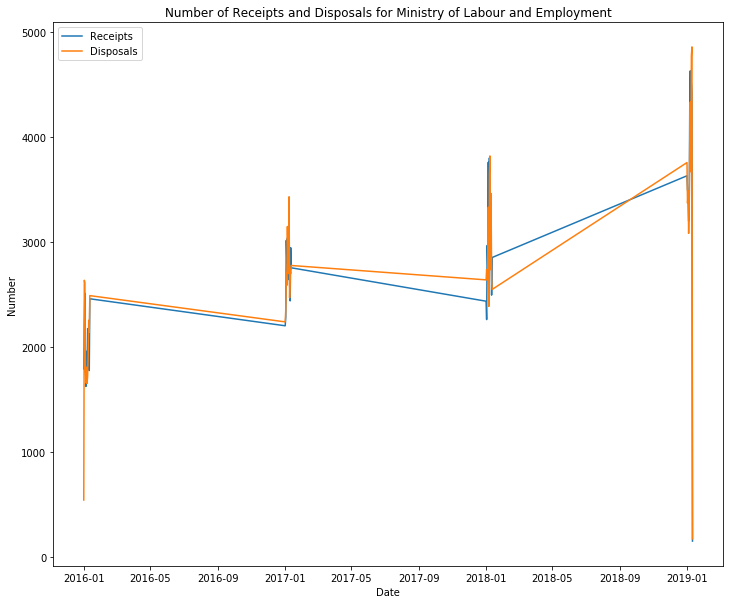

In [39]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(min_le.Date,min_le.Receipts, label="Receipts")
plt.plot(min_le.Date,min_le.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Ministry of Labour and Employment")
plt.legend()
plt.show()

In [40]:
print("Statistics for the Ministry of Labour and Employment:")
receipts8 = min_le.Receipts.sum()
disposals8 = min_le.Disposals.sum()
print("Total Receipts generated:", min_le.Receipts.sum())
print("Total Number of Disposals:", min_le.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts8-disposals8)
print("Efficiency rate:", round(disposals8*100/receipts8))
print("Average number of disposals every month:", round(min_le.Disposals.mean()))
print("Number of Nodal Officers:543")

Statistics for the Ministry of Labour and Employment:
Total Receipts generated: 131283
Total Number of Disposals: 130080
Pending Receipts as on 01 November 2019: 1203
Efficiency rate: 99.0
Average number of disposals every month: 2768
Number of Nodal Officers:543


In [41]:
min_home = receipts_disposal[receipts_disposal["org_name"]=="Ministry of Home Affairs"]
min_home.head()

,org_name,Receipts,Disposals,Date
4308,Ministry of Home Affairs,2170,551,2016-01-01
4309,Ministry of Home Affairs,2076,902,2016-01-02
4310,Ministry of Home Affairs,1962,1831,2016-01-03
4311,Ministry of Home Affairs,1629,1007,2016-01-04
4312,Ministry of Home Affairs,1585,1273,2016-01-05


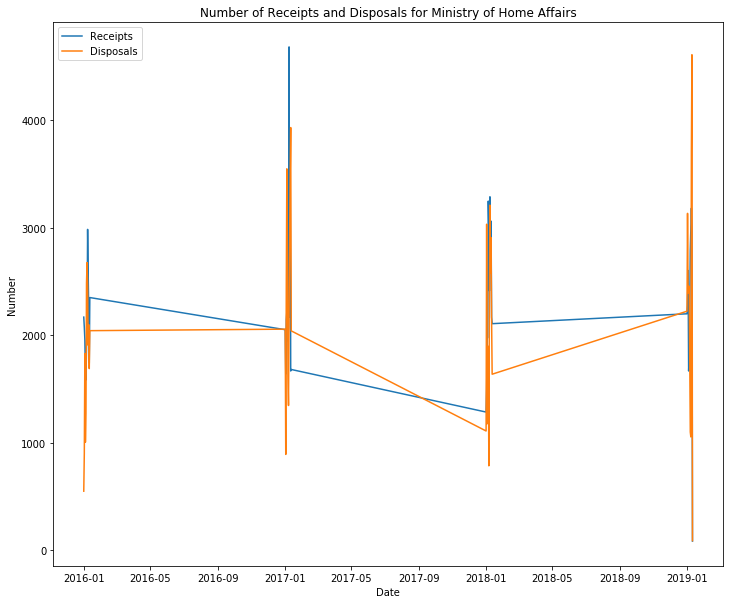

In [42]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(min_home.Date,min_home.Receipts, label="Receipts")
plt.plot(min_home.Date,min_home.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Ministry of Home Affairs")
plt.legend()
plt.show()

In [43]:
print("Statistics for the Ministry of Home Affairs:")
receipts9 = min_home.Receipts.sum()
disposals9 = min_home.Disposals.sum()
print("Total Receipts generated:", min_home.Receipts.sum())
print("Total Number of Disposals:", min_home.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts9-disposals9)
print("Efficiency rate:", round(disposals9*100/receipts9))
print("Average number of disposals every month:", round(min_home.Disposals.mean()))
print("Number of Nodal Officers:101")

Statistics for the Ministry of Home Affairs:
Total Receipts generated: 107286
Total Number of Disposals: 99540
Pending Receipts as on 01 November 2019: 7746
Efficiency rate: 93.0
Average number of disposals every month: 2118
Number of Nodal Officers:101


In [44]:
govt_MP = receipts_disposal[receipts_disposal["org_name"]=="Government of Madhya Pradesh"]
govt_MP.head()

,org_name,Receipts,Disposals,Date
2834,Government of Madhya Pradesh,1076,12,2016-01-01
2835,Government of Madhya Pradesh,1281,26,2016-01-02
2836,Government of Madhya Pradesh,1542,41,2016-01-03
2837,Government of Madhya Pradesh,1200,66,2016-01-04
2838,Government of Madhya Pradesh,1308,19,2016-01-05


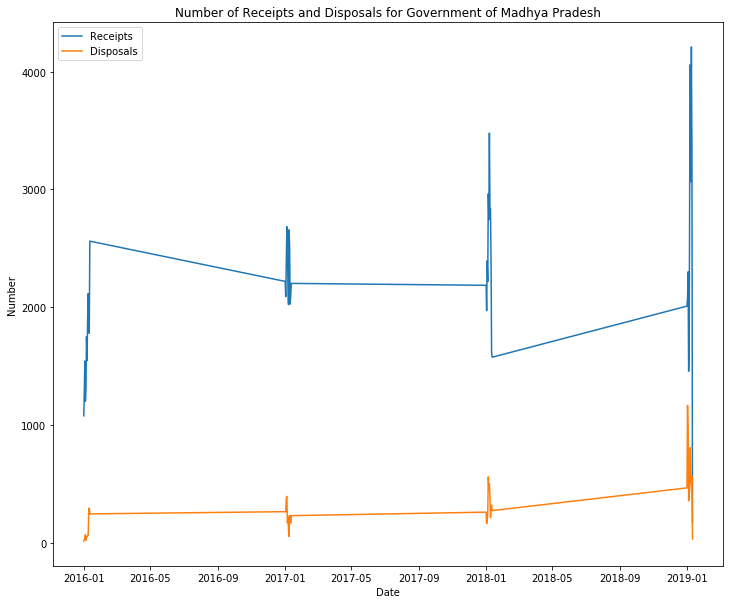

In [45]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(govt_MP.Date,govt_MP.Receipts, label="Receipts")
plt.plot(govt_MP.Date,govt_MP.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Government of Madhya Pradesh")
plt.legend()
plt.show()

In [46]:
print("Statistics for the Government of Madhya Pradesh:")
receipts10 = govt_MP.Receipts.sum()
disposals10 = govt_MP.Disposals.sum()
print("Total Receipts generated:", govt_MP.Receipts.sum())
print("Total Number of Disposals:", govt_MP.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts10-disposals10)
print("Efficiency rate:", round(disposals10*100/receipts10))
print("Average number of disposals every month:", round(govt_MP.Disposals.mean()))
print("Number of Nodal Officers:454")

Statistics for the Government of Madhya Pradesh:
Total Receipts generated: 104370
Total Number of Disposals: 13923
Pending Receipts as on 01 November 2019: 90447
Efficiency rate: 13.0
Average number of disposals every month: 296
Number of Nodal Officers:454


We will now try to forecast the receipts for the Department of Telecommunication for the next 12 months


In [47]:
#importing necessary libraries
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
import warnings
warnings.filterwarnings('ignore')

In [48]:
#dropping Disposals column and setting Date as index
dept_telecom_receipts = dept_telecom.drop(["Disposals","org_name"],axis=1)
dept_telecom_receipts = dept_telecom_receipts.set_index("Date")

In [49]:
dept_telecom_receipts.head()

,Receipts
Date,
2016-01-01,4336
2016-01-02,4755
2016-01-03,5118
2016-01-04,4806
2016-01-05,5498


The data now is in the form of a time series. So will try to apply time series forecasting using SARIMA Model


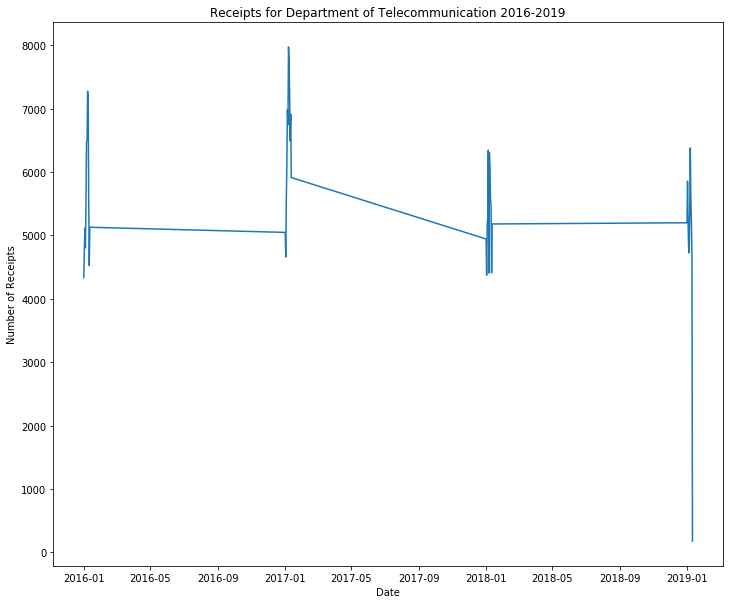

In [50]:
#visualizing the time series
plt.figure(figsize=(12,10))
plt.plot(dept_telecom_receipts)
plt.title("Receipts for Department of Telecommunication 2016-2019")
plt.xlabel("Date")
plt.ylabel("Number of Receipts")
plt.show()

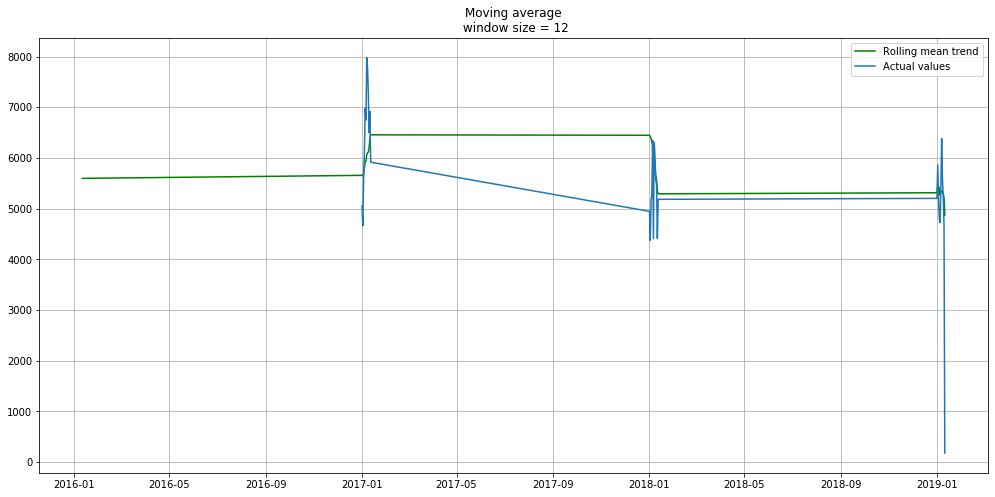

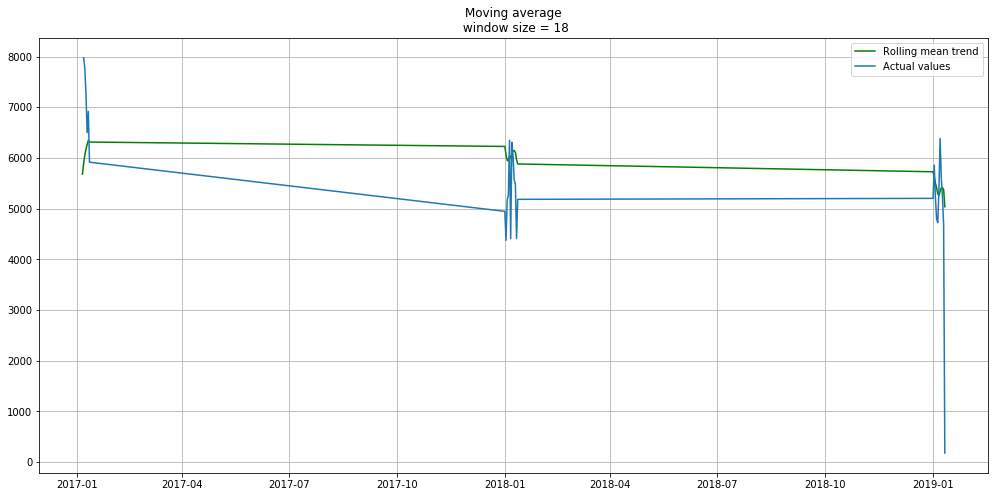

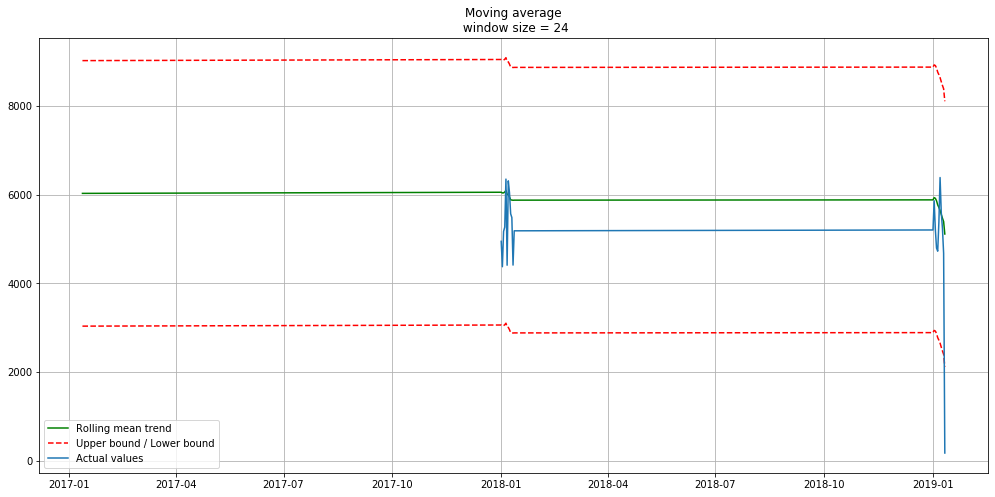

In [51]:
#moving average method
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 12 months  
plot_moving_average(dept_telecom_receipts.Receipts, 12)

#Smooth by the previous 18 months
plot_moving_average(dept_telecom_receipts.Receipts, 18)

#Smooth by previous 24 months
plot_moving_average(dept_telecom_receipts.Receipts, 24, plot_intervals=True)

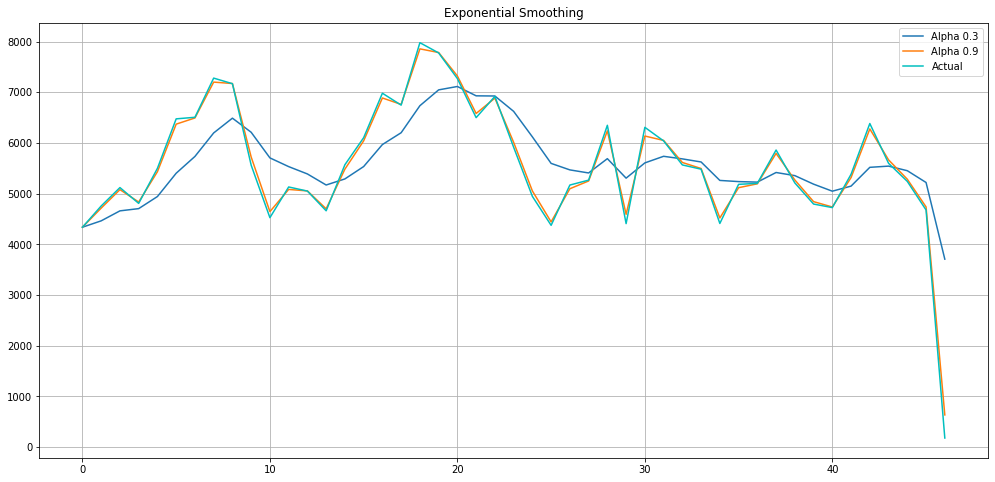

In [52]:
#exponential smoothing
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
  
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

plot_exponential_smoothing(dept_telecom_receipts.Receipts, [0.3, 0.9])

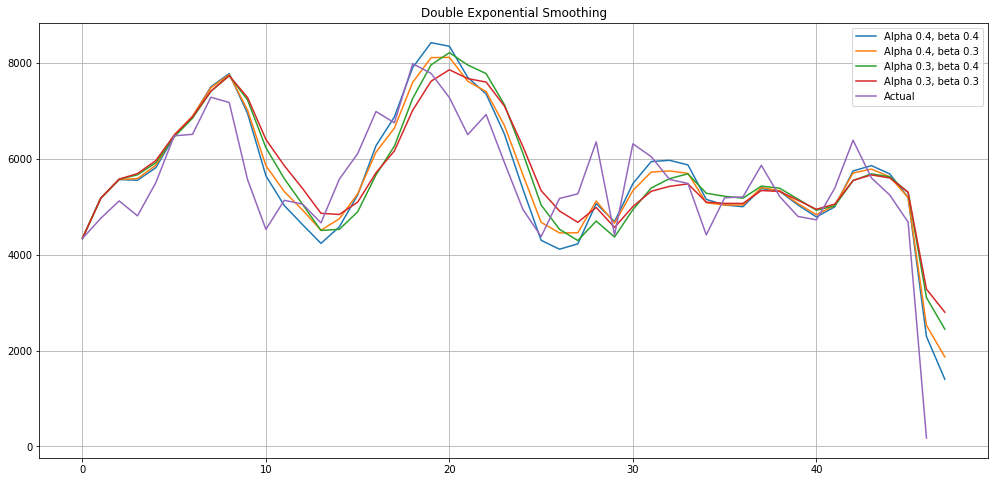

In [53]:
#Double Exponential Smoothing
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(dept_telecom_receipts.Receipts, alphas=[0.4, 0.3], betas=[0.4, 0.3])

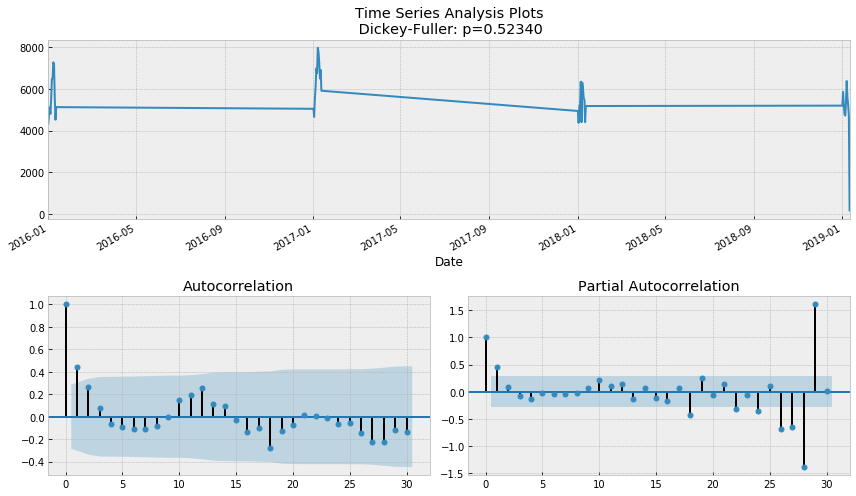

In [54]:
#Dickey Fuller Test
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(dept_telecom_receipts.Receipts, lags=30)

In [55]:
#SARIMA
#Set initial values and some bounds
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 5

#Create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Train many SARIMA models to find the best set of parameters
def optimize_SARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    """
    
    results = []
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(dept_telecom_receipts.Receipts, order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

result_table = optimize_SARIMA(parameters_list, d, D, s)

#Set parameters that give the lowest AIC (Akaike Information Criteria)
p, q, P, Q = result_table.parameters[0]

best_model = sm.tsa.statespace.SARIMAX(dept_telecom_receipts.Receipts, order=(p, d, q),
                                       seasonal_order=(P, D, Q, s)).fit(disp=-1)

print(best_model.summary())


                                 Statespace Model Results                                
Dep. Variable:                          Receipts   No. Observations:                   47
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 5)   Log Likelihood                -348.684
Date:                           Mon, 06 Jan 2020   AIC                            701.368
Time:                                   01:19:15   BIC                            704.795
Sample:                                        0   HQIC                           702.616
                                            - 47                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L5       -0.8258      0.366     -2.256      0.024      -1.543      -0.108
sigma2      1.287e+06   1.87e+05      6.88

In [58]:
#check the predicted values
predictions = best_model.predict()
predictions

Date
2016-01-01       0.000000
2016-01-02    4336.000000
2016-01-03    4755.000000
2016-01-04    5118.000000
2016-01-05    4806.000000
2016-01-06    7686.320864
2016-01-07    6752.282004
2016-01-08    6746.089183
2016-01-09    7070.782851
2016-01-10    7627.597009
2016-01-11    7137.274139
2016-01-12    4700.384276
2017-01-01    5590.274173
2017-01-02    4881.843213
2017-01-03    4267.600368
2017-01-04    6229.095904
2017-01-05    6411.467660
2017-01-06    7272.602008
2017-01-07    6509.122159
2017-01-08    7987.738934
2017-01-09    8399.587651
2017-01-10    7724.770584
2017-01-11    6654.831866
2017-01-12    7058.857611
2018-01-01    5870.993890
2018-01-02    5298.037668
2018-01-03    4549.999603
2018-01-04    5384.406874
2018-01-05    5146.927749
2018-01-06    6092.571315
2018-01-07    4559.432942
2018-01-08    6613.063121
2018-01-09    6230.469882
2018-01-10    5697.551450
2018-01-11    4874.555742
2018-01-12    4915.949053
2019-01-01    5374.884440
2019-01-02    5261.270018
2019-01

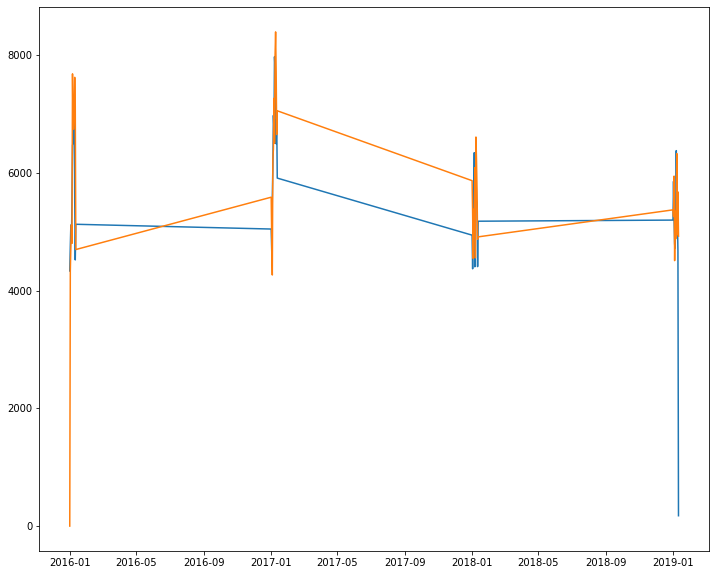

In [59]:
#plot the predicted values against the original values
plt.figure(figsize=(12,10))
plt.plot(dept_telecom["Date"],dept_telecom_receipts["Receipts"])
plt.plot(dept_telecom["Date"],predictions)
plt.show()

In [62]:
#forecasting values for the next 12 months
forecasted_values = best_model.forecast(steps=12)

Similar forecasting can be carried out for other departments too
